# Practical session II

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

ModuleNotFoundError: No module named 'seaborn'

In [367]:
ts=pd.read_table('training_set_parsed.tsv')
bs=pd.read_table('benchmarking_set_parsed.tsv')

colors=['#bcbd22', '#9467bd']

### SP length distribution

<function matplotlib.pyplot.show(close=None, block=None)>

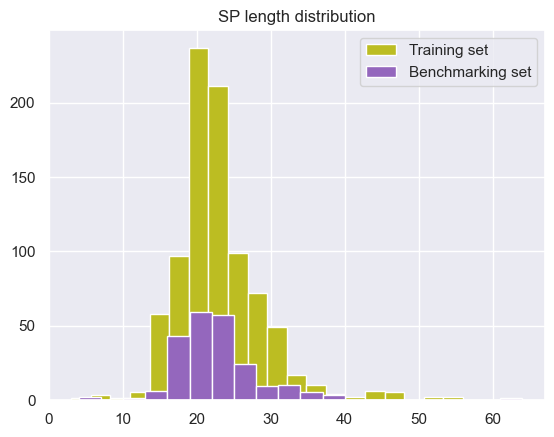

In [376]:
plt.hist(ts["End"], bins=20, label="Training set", color=colors[0])
plt.hist(bs["End"], bins=20, label="Benchmarking set", color=colors[1])
plt.title("SP length distribution")
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

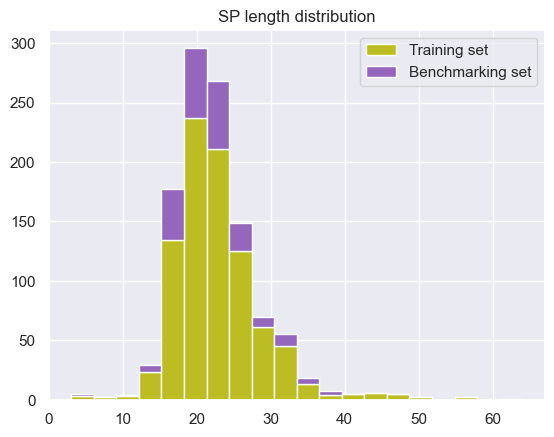

In [375]:
sp_length = pd.concat([ts["End"], bs["End"]], axis=1)
sp_length.columns = ['Training set', 'Benchmarking set']
sp_length


plt.hist(sp_length, bins=20, color=colors, stacked=True, label=sp_length.columns)

plt.title("SP length distribution")
plt.legend()
plt.show

,Training set,Benchmarking set
0,26.0,24.0
1,26.0,19.0
2,43.0,20.0
3,17.0,17.0
4,28.0,18.0
...,...,...
8459,NaN,NaN
8460,NaN,NaN
8461,NaN,NaN
8462,NaN,NaN


### Taxonomic classification

#### At kingdom level

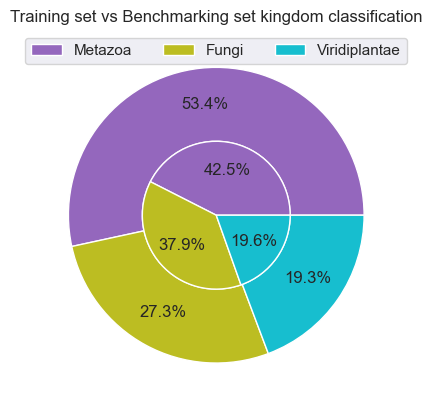

In [345]:
kingdom_ts=ts["Kingdom"].value_counts()
kingdom_bs=bs["Kingdom"].value_counts()

fig, ax = plt.subplots()

size = 0.5

cmap = plt.colormaps["tab20"]
outer_colors = cmap([8, 16, 18])
inner_colors = cmap([8, 16, 18])

ax.pie(kingdom_ts, radius=1, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'), autopct='%1.1f%%', pctdistance=1-size/2)

ax.pie(kingdom_bs, radius=1-size, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'), autopct='%1.1f%%', pctdistance=1-size/1.3)

ax.set(aspect="equal", title='Training set vs Benchmarking set kingdom classification')

ax.legend(kingdom_bs.index.values, loc='upper center', ncol=3)
plt.show()

In [176]:
# kingdom_ts=ts["Kingdom"].value_counts()
# plt.pie(kingdom_ts, labels=kingdom_ts.index, colors=sns.color_palette("hls", 8), autopct='%1.1f%%')
# plt.title('Kingdom classification for Training set')

In [175]:
# kingdom_bs=bs["Kingdom"].value_counts()
# plt.pie(kingdom_bs, labels=kingdom_bs.index, colors=plt.colormaps["tab10"]([4, 8, 9]), autopct='%1.1f%%')
# plt.title('Kingdom classification for Benchmarking set')

#### At species level

<function matplotlib.pyplot.show(close=None, block=None)>

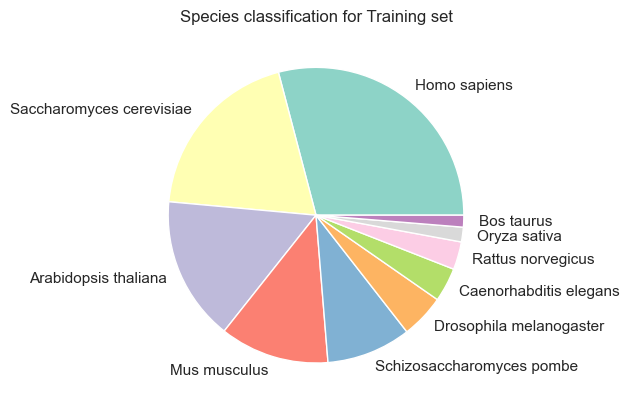

In [232]:
species_ts=ts["Species"].value_counts()[0:10]

plt.pie(species_ts, labels=species_ts.index.values)
plt.title('Species classification for Training set')

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

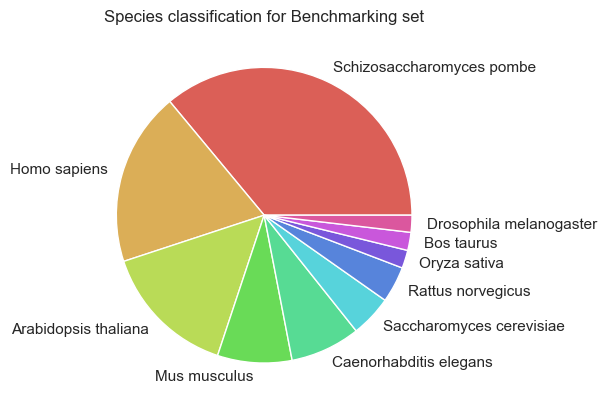

In [233]:
species_bs=bs["Species"].value_counts()[0:10]

plt.pie(species_bs, labels=species_bs.index, colors=sns.color_palette("hls", 10))
plt.title('Species classification for Benchmarking set')

plt.show

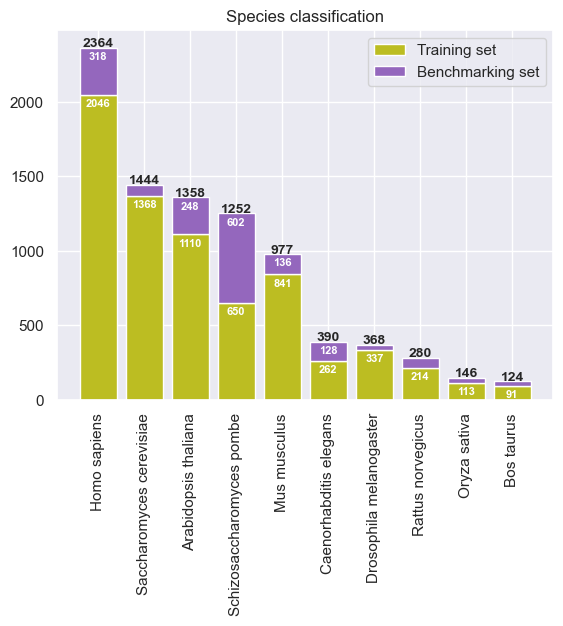

In [341]:
species=pd.concat([species_ts,species_bs], axis=1)
species.columns = ['Training set', 'Benchmarking set']
species=species.loc[species.sum(axis=1).sort_values(ascending=False).index]

fig, ax = plt.subplots()

bottom = np.zeros(len(species))

for i, col in enumerate(species.columns):
  ax.bar(species.index, species[col], bottom=bottom, label=col, color=colors[i])
  bottom += np.array(species[col])

# Sum up the rows of our data to get the total value of each bar.
total_values = species.sum(axis=1)
# Set an offset that is used to bump the label up a bit above the bar.
y_offset = 6
# Add labels to each bar.
for i, total in enumerate(total_values):
  ax.text(total_values.index[i], total + y_offset, round(total), ha='center',
          weight='bold', size=10)

# Let's put the annotations inside the bars themselves by using a
# negative offset.
y_offset = -80
threshold = 80
# For each patch (basically each rectangle within the bar), add a label.
for bar in ax.patches:
  if bar.get_height()< threshold:
    continue
  ax.text(
      # Put the text in the middle of each bar. get_x returns the start
      # so we add half the width to get to the middle.
      bar.get_x() + bar.get_width() / 2,
      # Vertically, add the height of the bar to the start of the bar,
      # along with the offset.
      bar.get_height() + bar.get_y() + y_offset,
      # This is actual value we'll show.
      round(bar.get_height()),
      # Center the labels and style them a bit.
      ha='center',
      color='w',
      weight='bold',
      size=8
  )

plt.xticks(rotation='vertical')
plt.title('Species classification')
plt.legend()
plt.show

plt.savefig("species_class.png", dpi=1200, bbox_inches = "tight")